# Exercise 1

We first load a dataset and examine its dimensions.

In [132]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [133]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

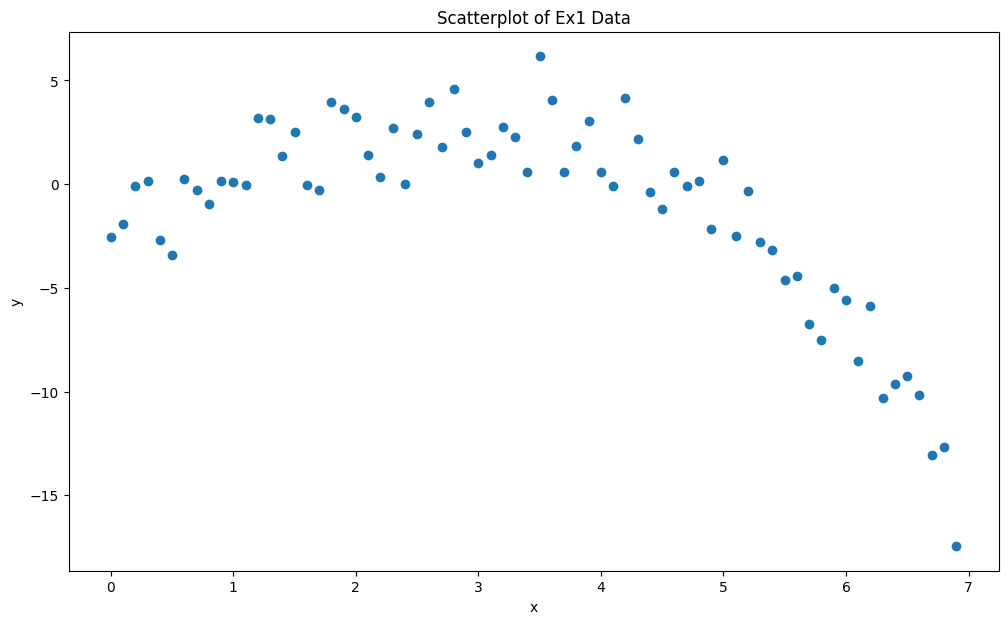

In [134]:
import matplotlib.pyplot as plt
# Your code for scatterplot here
plt.scatter(xy_data[:,0], xy_data[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of Ex1 Data')
plt.show()


### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [135]:
def polyreg(data_matrix, k):
    # Your code for polyreg here
    # The function should return the the coefficient vector beta, the fit, and the vector of residuals
    xvalues = data_matrix[:,0]
    yvalues = data_matrix[:,1]
    N = len(xvalues)
    
    if k >= N:
        polyorder = N-1
    else:
        polyorder = k
    
    X  = np.column_stack([xvalues**i for i in range(polyorder+1)]) # generates the matrix X with columns of 1, xvalues, xvalues^2, ..., xvalues^k
    XT = X.T  # transpose
    
    beta_lin = np.linalg.inv(XT.dot(X)).dot(XT.dot(yvalues)) # formula for beta*
    fit_lin = X.dot(beta_lin) # formula for closet fit to the data
    resid_lin = yvalues - fit_lin # the residuals are the difference between the data and the fit
    
    return beta_lin, fit_lin, resid_lin

sample_data = np.transpose(np.array([[1,2,3,4,5],[2,5,7,11,15]]))
print(*polyreg(sample_data, 2))

[0.4        1.48571429 0.28571429] [ 2.17142857  4.51428571  7.42857143 10.91428571 14.97142857] [-0.17142857  0.48571429 -0.42857143  0.08571429  0.02857143]


Use the tests below to check the outputs of the function you have written:

In [136]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

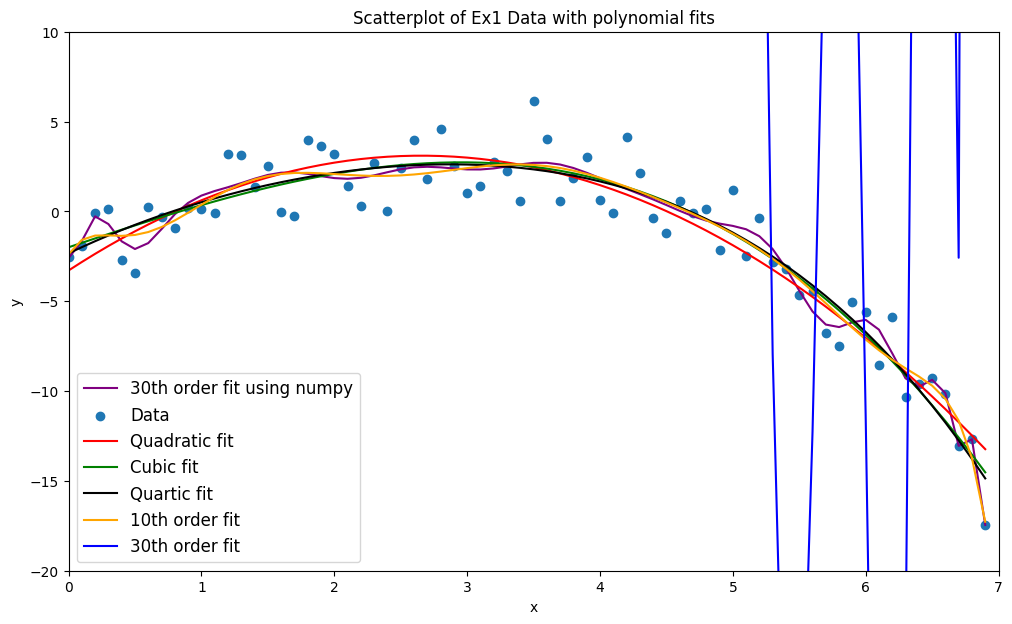

(quadratic) SSE_2  =  172.18 , R^2_2 =  0.89
(cubic) SSE_3  =  152.41 , R^2_3 =  0.9
(quartic) SSE_4  =  151.23 , R^2_4 =  0.9
(10th order) SSE_10  =  134.52 , R^2_10 =  0.91
(30th order) SSE_30  =  60854463229.66 , R^2_30 =  -39715348.37
(30th order using numpy) SSE_30_np  =  118.4 , R^2_30_np =  0.92


In [137]:
#Your code here

#data and polynomial fits
xvalues, yvalues = xy_data[:,0], xy_data[:,1] # true data
beta_quad, fit_quad, residual_quad = polyreg(xy_data, k=2) # quadratic fit
beta_cubic, fit_cubic, residual_cubic = polyreg(xy_data, k=3) # cubic fit
beta_quartic, fit_quartic, residual_quartic = polyreg(xy_data, k=4) # quartic fit
beta_10, fit_10, residual_10 = polyreg(xy_data, k=10) # 10th order fit
beta_30, fit_30, residual_30= polyreg(xy_data, k=30) # 30th order fit

beta_30_np, *_ = np.polyfit(xvalues, yvalues, 30, full=True) # 30th order fit using numpy
fit_30_np = np.polyval(beta_30_np, xvalues) # fit using numpy
residual_30_np = yvalues - fit_30_np # residuals using numpy
plt.plot(xvalues, np.polyval(beta_30_np, xvalues), label='30th order fit using numpy', color='purple')


# plotting
plt.scatter(xvalues, yvalues, label='Data')
plt.plot(xvalues, fit_quad, label='Quadratic fit', color='red')
plt.plot(xvalues, fit_cubic, label='Cubic fit', color='green')
plt.plot(xvalues, fit_quartic, label='Quartic fit', color='black')
plt.plot(xvalues, fit_10, label='10th order fit', color='orange')
plt.plot(xvalues, fit_30, label='30th order fit', color='blue')

plt.xlabel('x')
plt.ylabel('y')
plt.axis((0,7,-20,10))
plt.title('Scatterplot of Ex1 Data with polynomial fits')
plt.legend(fontsize = 'large')
plt.savefig('Exercise 1 linear regression of data points')
plt.show()

# computing values of SSE and R^2
def SSE(residuals):
    # SSE = sum of residuals squared
    return np.sum(residuals**2)
def R2(data, SSE):
    # R^2 = 1 - SSE(from the data)/sum of squared deviations from the mean(or the SSE of the k=0 fit)
    return 1 - SSE/np.sum((data - np.mean(data))**2)

SSE_2 = SSE(residual_quad)
SSE_3 = SSE(residual_cubic)
SSE_4 = SSE(residual_quartic)
R2_2 = R2(yvalues, SSE_2)
R2_3 = R2(yvalues, SSE_3)
R2_4 = R2(yvalues, SSE_4)

print('(quadratic) SSE_2  = ', np.round_(SSE_2, 2), ', R^2_2 = ', np.round_(R2_2, 2))
print('(cubic) SSE_3  = ', np.round_(SSE_3, 2), ', R^2_3 = ', np.round_(R2_3, 2))
print('(quartic) SSE_4  = ', np.round_(SSE_4, 2), ', R^2_4 = ', np.round_(R2_4, 2))
# some extra k values outside the scope of the task
print('(10th order) SSE_10  = ', np.round_(SSE(residual_10), 2), ', R^2_10 = ', np.round_(R2(yvalues, SSE(residual_10)), 2))
print('(30th order) SSE_30  = ', np.round_(SSE(residual_30), 2), ', R^2_30 = ', np.round_(R2(yvalues, SSE(residual_30)), 2))
print('(30th order using numpy) SSE_30_np  = ', np.round_(SSE(residual_30_np), 2), ', R^2_30_np = ', np.round_(R2(yvalues, SSE(residual_30_np)), 2))

 #### State which model you choose and briefly justify your choice.
 
 
 The k=2 fit has a higher SSEs compared to the k=3 and k=4 fits.
 
 Therefore as the k=3 and k=4 have similar SSE and R^2 values you could use the k=3 as this is computationally less expensive to use

 Therefore I suggest the k=3 model

 note how the function I built fails at high order k, shown by comparing numpys inbuilt function to mine we can see a huge discrepancy for the k=30 case
 
 

In [142]:
#here i want find the ideal polynomial order k
# I will find the lowest SSE and the highest R^2
for i in range(0,70,2):
    beta_i, fit_i, residual_i = polyreg(xy_data, k=i)
    SSE_i = SSE(residual_i)
    R2_i = R2(fit_i, SSE_i)
    print('SSE_', i, ' = ', np.round_(SSE_i, 2), ', R^2_', i, ' = ', np.round_(R2_i, 10))
    
#from the printouts, we can see that the k=10 case is the best fit

SSE_ 0  =  1532.27 , R^2_ 0  =  -4.4397197597077174e+32
SSE_ 2  =  172.18 , R^2_ 2  =  0.8734041767
SSE_ 4  =  151.23 , R^2_ 4  =  0.8904969946
SSE_ 6  =  150.33 , R^2_ 6  =  0.8912167939
SSE_ 8  =  140.17 , R^2_ 8  =  0.8993068061
SSE_ 10  =  134.52 , R^2_ 10  =  0.9029685202
SSE_ 12  =  5189166.23 , R^2_ 12  =  -0.5992593456
SSE_ 14  =  6222702.24 , R^2_ 14  =  -0.3960777474
SSE_ 16  =  66540817.83 , R^2_ 16  =  -0.6491638001
SSE_ 18  =  602123.22 , R^2_ 18  =  -0.017979368
SSE_ 20  =  475051782.33 , R^2_ 20  =  -0.3772183213
SSE_ 22  =  69227688.04 , R^2_ 22  =  -0.5234036099
SSE_ 24  =  3959702.84 , R^2_ 24  =  -0.3602507126
SSE_ 26  =  100071162.26 , R^2_ 26  =  -0.4813840096
SSE_ 28  =  11835518735.72 , R^2_ 28  =  -0.2454491642
SSE_ 30  =  60854463229.66 , R^2_ 30  =  -0.257803988
SSE_ 32  =  947978371075.5 , R^2_ 32  =  -0.2972739025
SSE_ 34  =  551997964625648.8 , R^2_ 34  =  -0.2131326295
SSE_ 36  =  2002591239880.9 , R^2_ 36  =  -0.2759797596
SSE_ 38  =  83876975518334.73 , 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

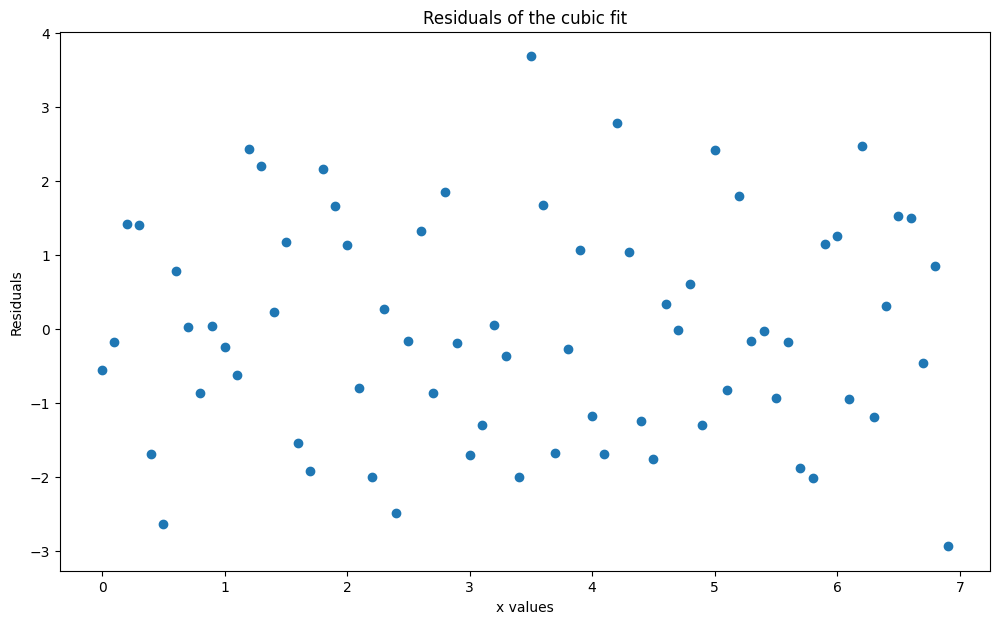

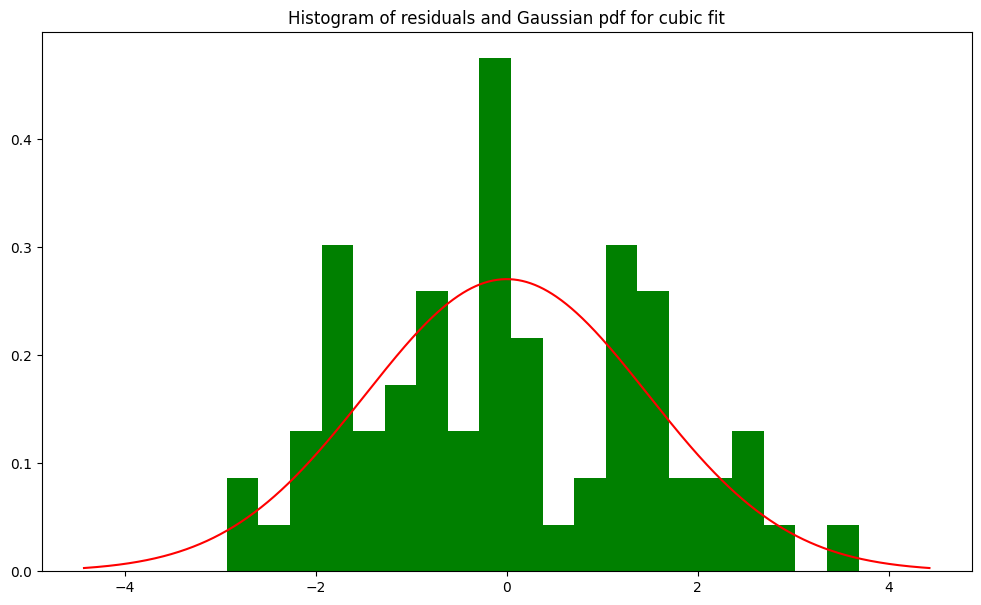

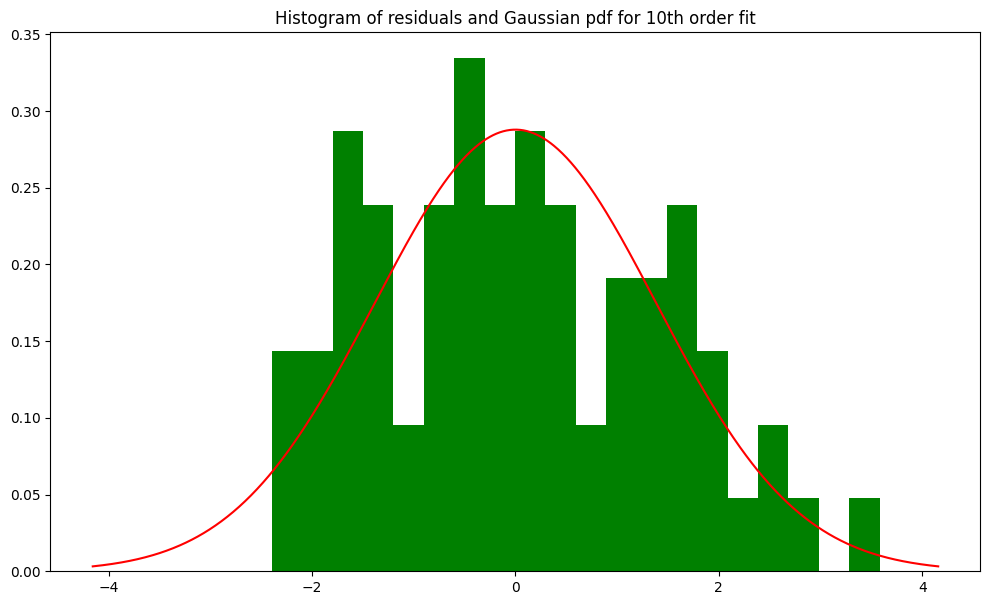

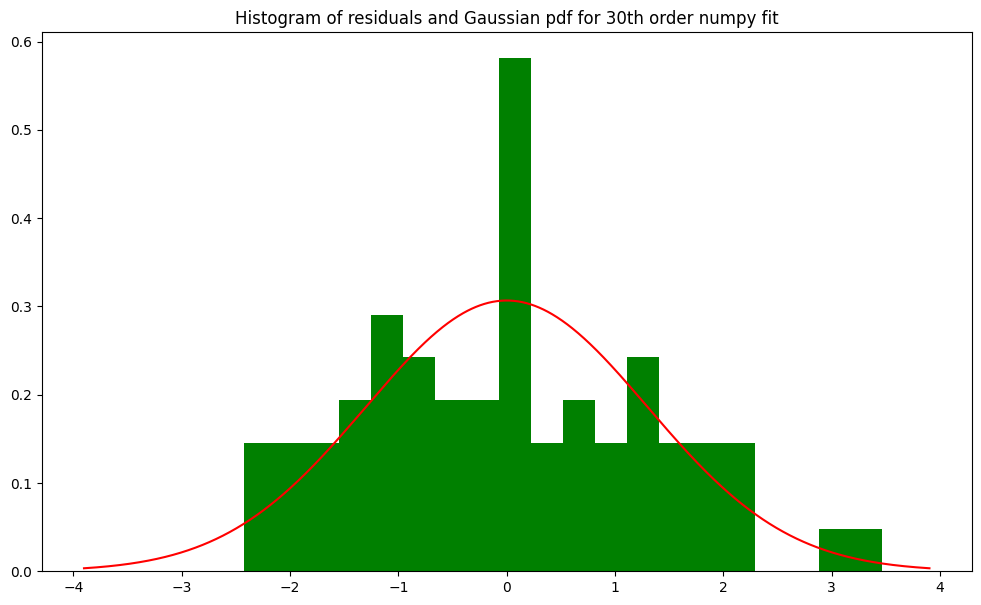

In [144]:
#Your code here
from scipy.stats import norm
def plot_residuals(x, residuals, fit_type):
    plt.scatter(x, residuals)
    plt.xlabel('x values')
    plt.ylabel('Residuals')
    plt.title('Residuals of the ' + fit_type + ' fit')
    plt.savefig('Exercise 1 plot of residuals for ' + fit_type + ' fit')
    plt.show()

def plot_histogram_gaussian(residuals, fit_type):
    # Plot normed histogram of the residuals
    n, bins, patches = plt.hist(residuals, bins=20, density=True, facecolor='green')
    
    # Plot Gaussian pdf with same mean and variance as the residuals
    res_stdev = np.std(residuals)  #standard deviation of residuals
    xvals = np.linspace(-3*res_stdev,3*res_stdev,1000)
    plt.title('Histogram of residuals and Gaussian pdf for ' + fit_type + ' fit')
    plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_stdev), 'r')
    plt.savefig('Exercise 1 histogram of residuals and Gaussian pdf for ' + fit_type + ' fit')
    plt.show()

plot_residuals(xvalues, residual_cubic, 'cubic')
plot_histogram_gaussian(residual_cubic, 'cubic')
plot_histogram_gaussian(residual_10, '10th order')
plot_histogram_gaussian(residual_30_np, '30th order numpy')

